In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings


filterwarnings("ignore")
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Virat_Kohli.csv')

In [3]:
df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2.0,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2.0,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1.0,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1.0,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1.0,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int64  
 1   BF          132 non-null    int64  
 2   4s          132 non-null    int64  
 3   6s          132 non-null    int64  
 4   SR          132 non-null    float64
 5   Pos         132 non-null    float64
 6   Dismissal   132 non-null    object 
 7   Inns        132 non-null    int64  
 8   Opposition  132 non-null    object 
 9   Ground      132 non-null    object 
 10  Start Date  132 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 11.5+ KB


In [5]:
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,132.0,46.848485,41.994635,0.0,10.0000,32.50,80.25,154.00
BF,132.0,50.871212,38.729716,0.0,17.7500,42.50,82.25,140.00
4s,132.0,4.371212,4.404032,0.0,1.0000,3.00,7.00,18.00
6s,132.0,0.545455,1.086795,0.0,0.0000,0.00,1.00,7.00
SR,132.0,76.991212,37.874491,0.0,61.7025,78.71,100.00,209.09
Pos,132.0,3.303030,0.873174,1.0,3.0000,3.00,4.00,7.00
Inns,132.0,1.575758,0.496110,1.0,1.0000,2.00,2.00,2.00


In [6]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Dismissal,132,7,caught,84
Opposition,132,11,v Sri Lanka,24
Ground,132,52,Dhaka,7
Start Date,132,132,8-Oct-14,1


        Looks like Virat has gotten out majority of the times by getting caught

In [7]:
# Cleaning the data by taking out 'v'
for val in df['Opposition'].index.values:
     print(df['Opposition'].loc[val][ df['Opposition'].loc[val].find(' ')+1:])
     df['Opposition'].loc[val] = df['Opposition'].loc[val][ df['Opposition'].loc[val].find(' ')+1:]

Sri Lanka
Sri Lanka
Sri Lanka
Sri Lanka
Sri Lanka
Sri Lanka
Australia
Australia
Sri Lanka
Sri Lanka
Sri Lanka
Bangladesh
Bangladesh
South Africa
South Africa
Zimbabwe
Zimbabwe
Sri Lanka
Sri Lanka
Sri Lanka
Sri Lanka
Australia
New Zealand
New Zealand
New Zealand
New Zealand
New Zealand
South Africa
South Africa
South Africa
South Africa
South Africa
Bangladesh
Ireland
Netherlands
South Africa
West Indies
Australia
Pakistan
Sri Lanka
West Indies
West Indies
West Indies
West Indies
West Indies
England
England
England
England
England
England
England
England
West Indies
West Indies
West Indies
West Indies
West Indies
Australia
Australia
Australia
Australia
Bangladesh
Sri Lanka
Sri Lanka
Sri Lanka
Sri Lanka
Sri Lanka
Pakistan
Pakistan
Pakistan
England
England
England
England
England
England
West Indies
West Indies
Zimbabwe
Zimbabwe
Zimbabwe
Australia
Australia
Australia
Australia
Australia
West Indies
West Indies
West Indies
South Africa
South Africa
New Zealand
New Zealand
New Zealand
New Z

In [8]:
df['year'] = pd.DatetimeIndex(df['Start Date']).year

In [9]:
df['month'] = pd.DatetimeIndex(df['Start Date']).month

In [10]:
df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,year,month
0,12,22,1,0,54.54,2.0,lbw,1,Sri Lanka,Dambulla,18-Aug-08,2008,8
1,37,67,6,0,55.22,2.0,caught,2,Sri Lanka,Dambulla,20-Aug-08,2008,8
2,25,38,4,0,65.78,1.0,run out,1,Sri Lanka,Colombo (RPS),24-Aug-08,2008,8
3,54,66,7,0,81.81,1.0,bowled,1,Sri Lanka,Colombo (RPS),27-Aug-08,2008,8
4,31,46,3,1,67.39,1.0,lbw,2,Sri Lanka,Colombo (RPS),29-Aug-08,2008,8


In [11]:
df['Opposition'].value_counts()

Sri Lanka       24
England         21
Australia       20
West Indies     19
South Africa    15
New Zealand     14
Bangladesh       8
Zimbabwe         5
Pakistan         4
Ireland          1
Netherlands      1
Name: Opposition, dtype: int64

In [12]:
#Total runs scored by virat till 2017
df['Runs'].sum()

6184

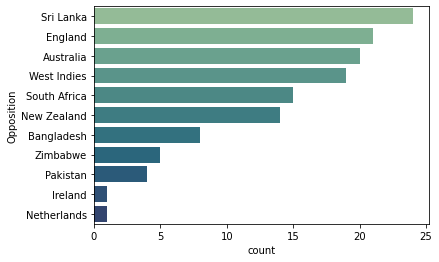

In [13]:
sns.countplot(y=df['Opposition'],order = df['Opposition'].value_counts().index,palette='crest')
plt.show()

        Virat has played most matches against Srilanka followed by England and Australia

In [14]:
df.groupby('Opposition')['Runs'].sum().reset_index().sort_values('Runs',ascending=False)

,Opposition,Runs
8,Sri Lanka,1084
9,West Indies,1009
0,Australia,999
5,New Zealand,877
2,England,830
7,South Africa,558
1,Bangladesh,544
10,Zimbabwe,215
3,Ireland,34
6,Pakistan,22


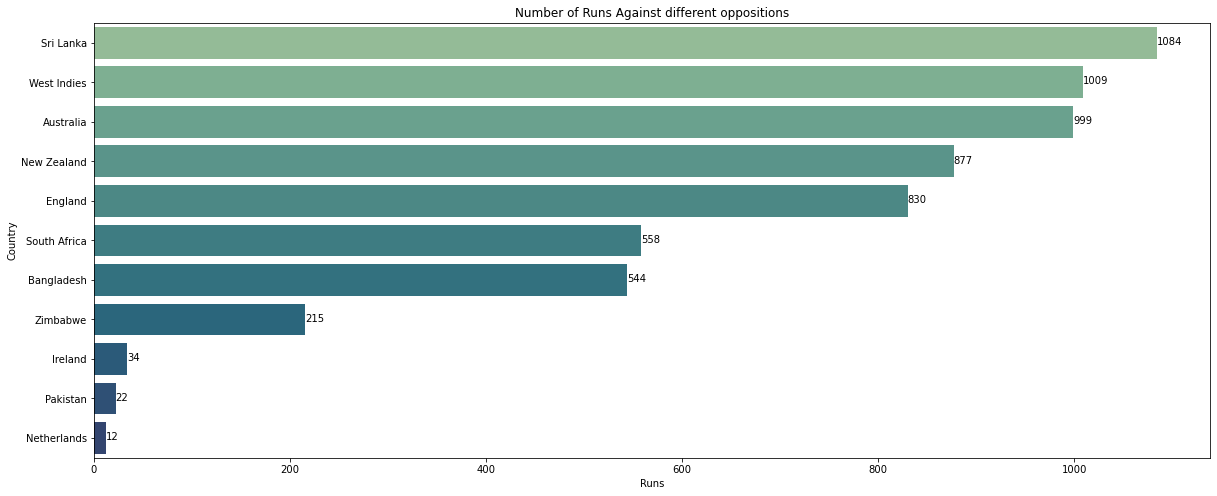

In [15]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x=df.groupby('Opposition')['Runs'].sum().reset_index().sort_values('Runs',ascending=False)['Runs'],
                 y=df.groupby('Opposition')['Runs'].sum().reset_index().sort_values('Runs',ascending=False)['Opposition'],
                 palette='crest');
ax.set(xlabel="Runs", 
       ylabel = "Country", title = "Number of Runs Against different oppositions");
for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_width()), xy=(bar.get_width()+0.005, bar.get_y()+0.45))

In [16]:
# Information available in 'Dismissal' field
df["Dismissal"].value_counts()

caught        84
not out       17
bowled        10
run out       10
lbw            9
stumped        1
hit wicket     1
Name: Dismissal, dtype: int64

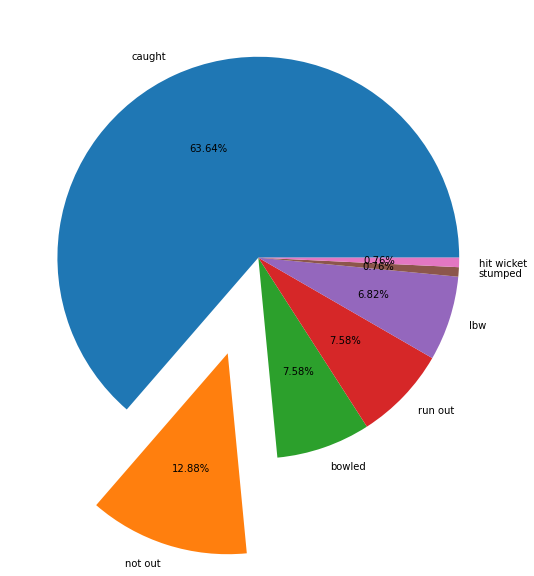

In [17]:
plt.figure(figsize=(9,15))
plt.pie(df["Dismissal"].value_counts(),labels=df["Dismissal"].value_counts().index,autopct='%0.2f%%',explode = (0, 0.50, 0, 0,0,0,0))
plt.show()

        Looks like Virat has gotten out majority of the times by getting caught

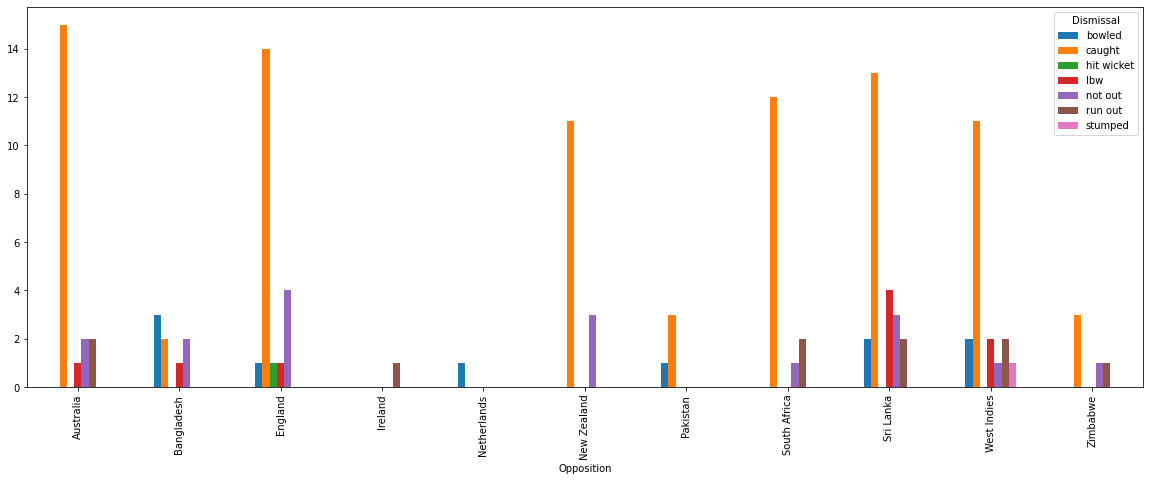

In [18]:
ct1=pd.crosstab(df['Opposition'],df['Dismissal'])
ct1.plot.bar(figsize = (20,7))
plt.show()

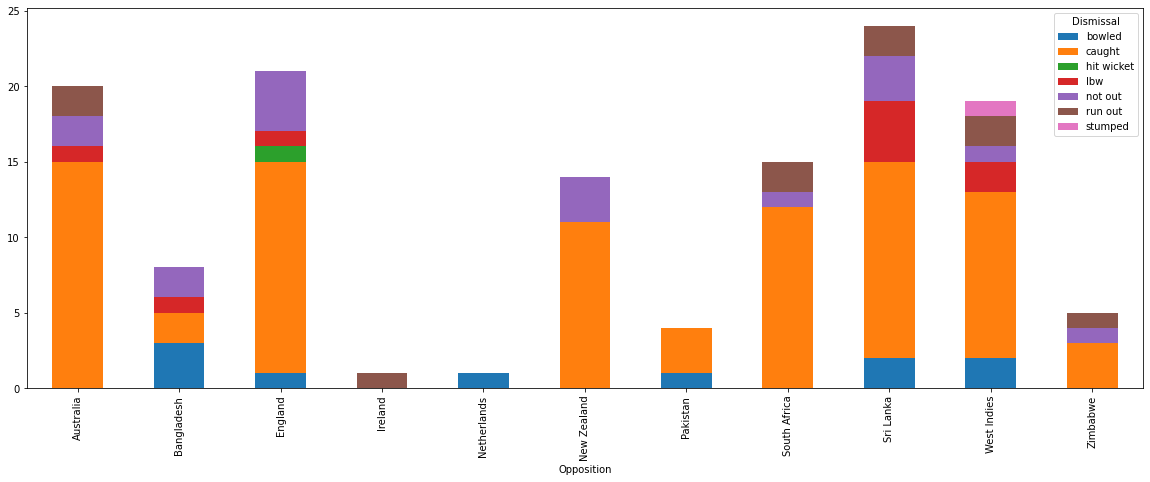

In [19]:
ct = pd.crosstab(df['Opposition'],df['Dismissal'],)
ct.plot.bar(stacked = True,figsize = (20,7))
plt.show()

        Netherlands have dismissed Kohli only once by getting him bowled. 
        
        Ireland have dismissed Kohli only once by run out 

        Virat has got out by hit wicket only against England.

        Against New Zealand virat has been dismissed only by catching.
        
        Australia haven't been able to get virat out by him getting bowled

        No other team has been able to stump him West Indies

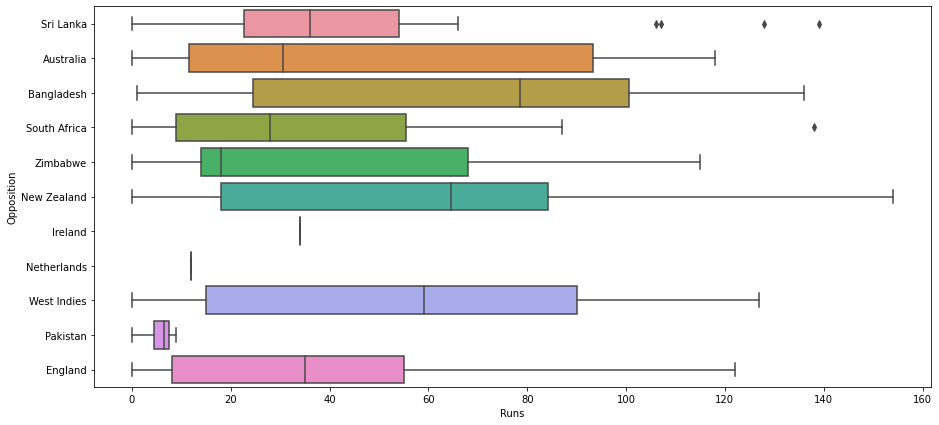

In [20]:
plt.figure(figsize=(15,7))
sns.boxplot(x= 'Runs', y='Opposition', data=df)
plt.show()

In [60]:
df[df["Opposition"]=="Bangladesh"]["Runs"].median() 

78.5

In [62]:
df[df["Opposition"]=="New Zealand"]["Runs"].median() 

64.5

In [63]:
df[df["Opposition"]=="Sri Lanka"]["Runs"].median() 

36.0

        Highest Median is against Bangladesh. As seen in the above plot for countries like Bangladesh and New Zealand he 
        has scored above 78.5 and 64.5 respectively in 50% of the matches played against each of them, While against 
        Sri Lanka he has scored more then only 36 in 50% of the matches

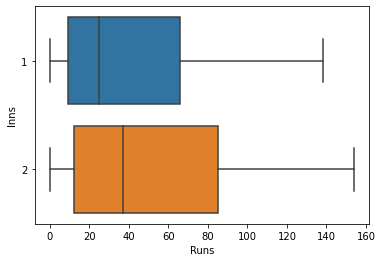

In [21]:
sns.boxplot(x="Runs", y="Inns", data=df, orient='h')
# orient='h' To display the boxplot on horizontal axis
plt.show()

        Kohli, known as the' Chase Master' in world cricket, as we we see has from the plot, has better run 
        scoring ability in the 2nd innings while chasing. His highest score has also come in while chasing.

        We all know that virat started transforming his body post 2012 IPL. So, Let us add a column which will help us to
        compatre his performace pre and post transformation

In [22]:
df['post_transform'] = df["year"]>2012

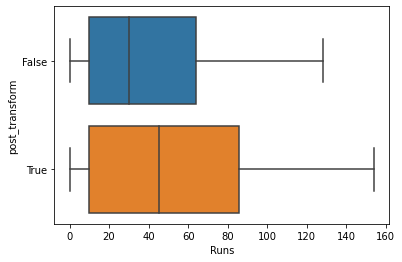

In [23]:
sns.boxplot(x="Runs", y="post_transform", data=df, orient='h')
plt.show()

        From the above plot it is clear that virat has been scoring more runs post transformation as the median value has 
        shifted to the right/Increased

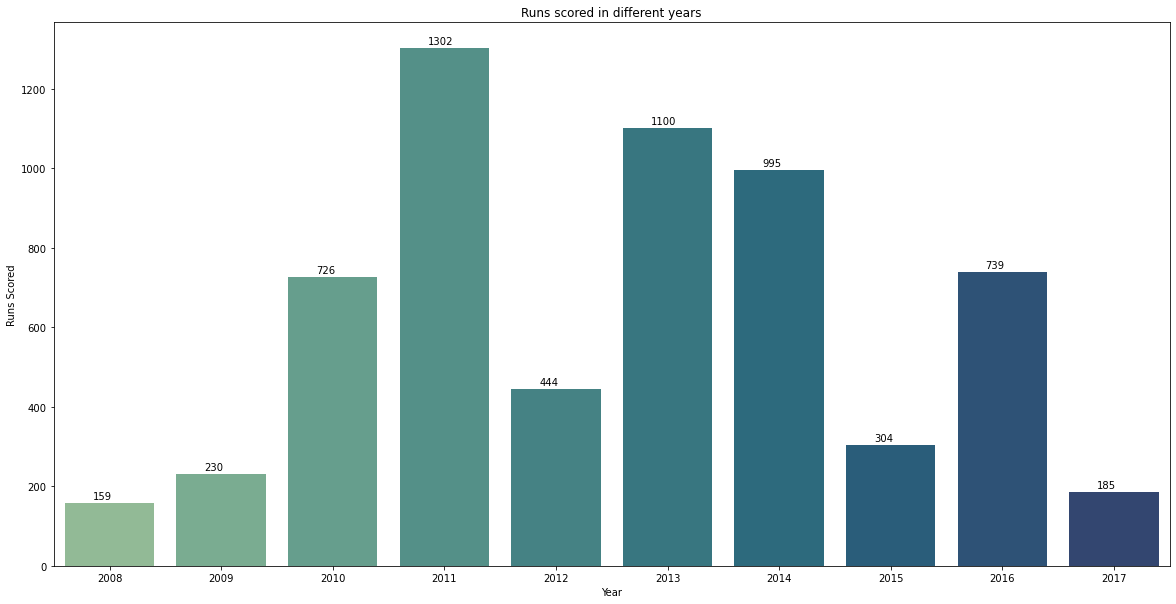

In [24]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='year',y='Runs',data=df,estimator=sum,ci=None,palette='crest');
ax.set(xlabel="Year", 
       ylabel = "Runs Scored", 
       title = "Runs scored in different years");

for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_height()), xy=(bar.get_x()+0.25, bar.get_height()+10))

In [25]:
df.groupby('post_transform')['Runs'].sum().reset_index().sort_values('Runs',ascending=False)

,post_transform,Runs
1,True,3323
0,False,2861


        We see that virat has score more post tranform compared to pre transform

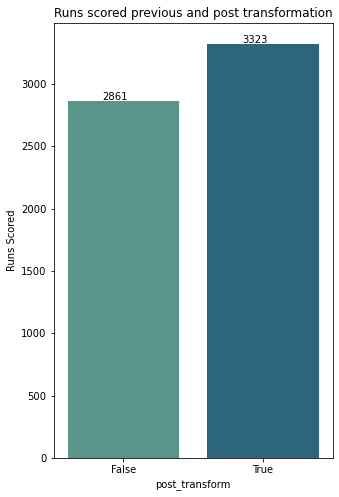

In [26]:
plt.figure(figsize=(5,8))
ax = sns.barplot(y=df.groupby('post_transform')['Runs'].sum().reset_index().sort_values('Runs',ascending=False)['Runs'],
                 x=df.groupby('post_transform')['Runs'].sum().reset_index().sort_values('Runs',ascending=False)['post_transform'],
                 palette='crest');
ax.set(xlabel="post_transform", 
       ylabel = "Runs Scored", 
       title = "Runs scored previous and post transformation");



for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_height()), xy=(bar.get_x()+0.25, bar.get_height()+10))
    
    

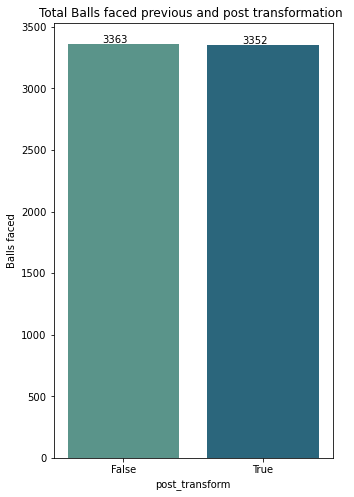

In [28]:
plt.figure(figsize=(5,8))
ax = sns.barplot(y=df.groupby('post_transform')['BF'].sum().reset_index().sort_values('BF',ascending=False)['BF'],
                 x=df.groupby('post_transform')['BF'].sum().reset_index().sort_values('BF',ascending=False)['post_transform'],
                 palette='crest');
ax.set(xlabel="post_transform", 
       ylabel = "Balls faced", 
       title = "Total Balls faced previous and post transformation ");



for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_height()), xy=(bar.get_x()+0.25, bar.get_height()+10))
    
    

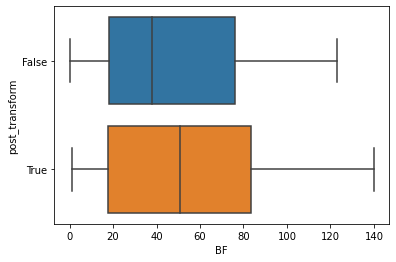

In [27]:
sns.boxplot(x="BF", y="post_transform", data=df, orient='h')
plt.show()

        Number of balls virat has faced has also increased post transformation

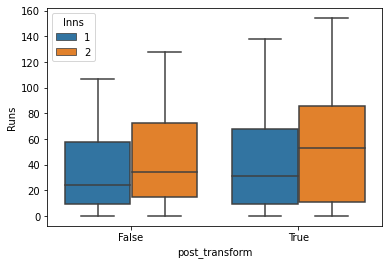

In [29]:
sns.boxplot(y="Runs", x="post_transform",hue='Inns', data=df, orient='v');
    

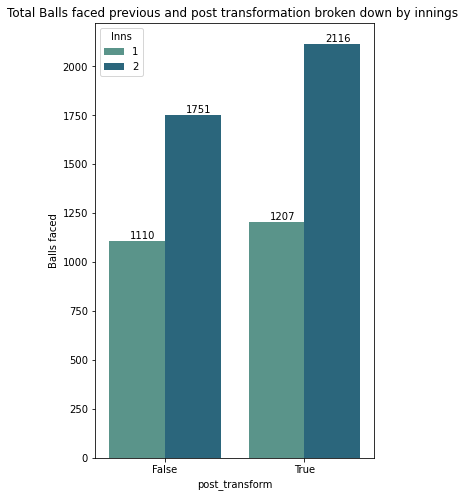

In [30]:
plt.figure(figsize=(5,8))
ax = sns.barplot(y='Runs',
                 x='post_transform',
                 hue='Inns',
                 data=df,
                 estimator=sum,
                 ci=None,
                 palette='crest');
ax.set(xlabel="post_transform", 
       ylabel = "Balls faced", 
       title = "Total Balls faced previous and post transformation broken down by innings ");



for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_height()), xy=(bar.get_x()+0.15, bar.get_height()+10))

        From the plots virat was good at chasing even before transformation, 
        But after transformation, his first innings scores also have improved

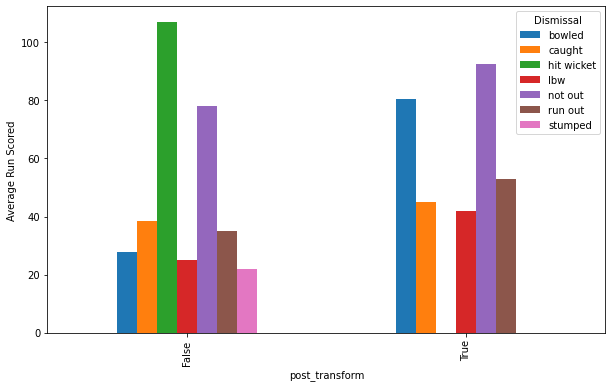

In [31]:
ct = pd.crosstab(index = df['post_transform'],columns=df['Dismissal'], values=df['Runs'],aggfunc='mean')
ct.plot.bar(figsize = (10,6))
plt.ylabel("Average Run Scored")
plt.show()

        Post tranformation, 
            virat hasn't been dismissed by stumping
            Average score before he gets out in any way has increased
            
        

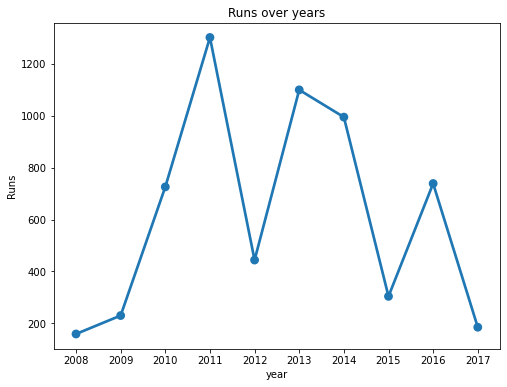

In [32]:
plt.figure(figsize=(8,6))
plt.title('Runs over years')
sns.pointplot(df['year'], df['Runs'],ci=None,estimator=sum)
plt.show()

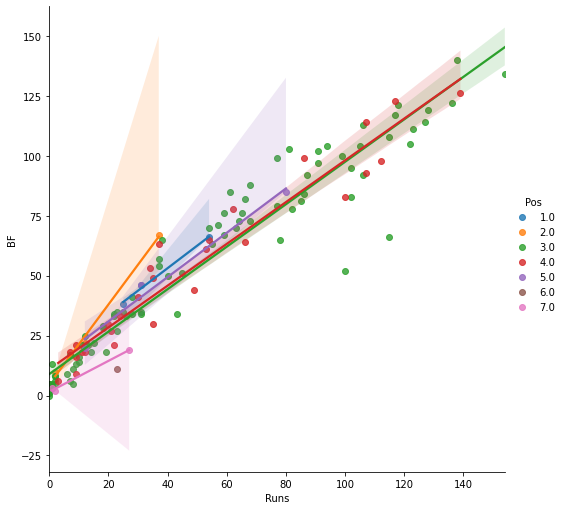

In [33]:
sns.lmplot(x="Runs", y="BF",hue='Pos', data=df,height=7)
plt.show()

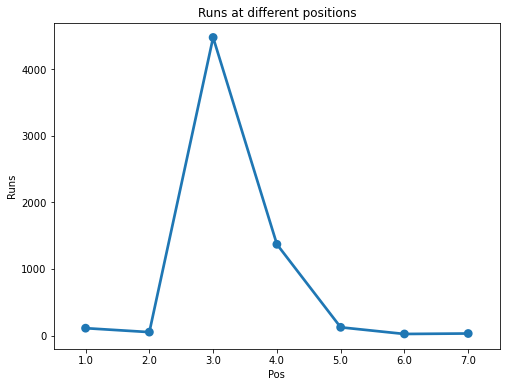

In [34]:
plt.figure(figsize=(8,6))
plt.title('Runs at different positions')
sns.pointplot(df['Pos'], df['Runs'],ci=None,estimator=sum)
plt.show()

        Virat has scored most of his runs batting at position 3

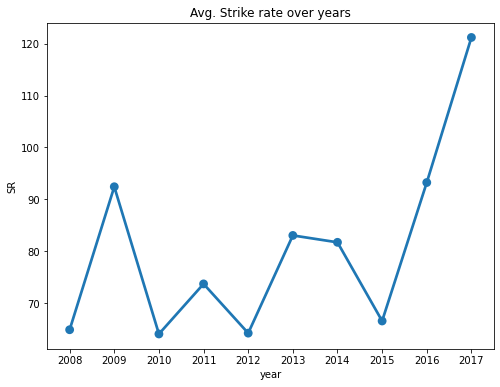

In [35]:
plt.figure(figsize=(8,6))
plt.title('Avg. Strike rate over years')
sns.pointplot(df['year'], df['SR'],ci=None)
plt.show()

        His strike rate post 2015 has increased exponentially

In [36]:
df['Boundaries'] = df['4s'] + df['6s']

In [37]:
df['Runs_in_Boundaries'] = (df['4s']*4) + (df['6s']*6)

In [38]:
df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,year,month,post_transform,Boundaries,Runs_in_Boundaries
0,12,22,1,0,54.54,2.0,lbw,1,Sri Lanka,Dambulla,18-Aug-08,2008,8,False,1,4
1,37,67,6,0,55.22,2.0,caught,2,Sri Lanka,Dambulla,20-Aug-08,2008,8,False,6,24
2,25,38,4,0,65.78,1.0,run out,1,Sri Lanka,Colombo (RPS),24-Aug-08,2008,8,False,4,16
3,54,66,7,0,81.81,1.0,bowled,1,Sri Lanka,Colombo (RPS),27-Aug-08,2008,8,False,7,28
4,31,46,3,1,67.39,1.0,lbw,2,Sri Lanka,Colombo (RPS),29-Aug-08,2008,8,False,4,18


In [39]:
df['% of runs through boundaries'] = round(  (df['Runs_in_Boundaries']/df['Runs'])*100 , 2)

In [40]:
df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,year,month,post_transform,Boundaries,Runs_in_Boundaries,% of runs through boundaries
0,12,22,1,0,54.54,2.0,lbw,1,Sri Lanka,Dambulla,18-Aug-08,2008,8,False,1,4,33.33
1,37,67,6,0,55.22,2.0,caught,2,Sri Lanka,Dambulla,20-Aug-08,2008,8,False,6,24,64.86
2,25,38,4,0,65.78,1.0,run out,1,Sri Lanka,Colombo (RPS),24-Aug-08,2008,8,False,4,16,64.00
3,54,66,7,0,81.81,1.0,bowled,1,Sri Lanka,Colombo (RPS),27-Aug-08,2008,8,False,7,28,51.85
4,31,46,3,1,67.39,1.0,lbw,2,Sri Lanka,Colombo (RPS),29-Aug-08,2008,8,False,4,18,58.06


In [41]:
df_year = df.groupby('year')[['Runs','Runs_in_Boundaries']].sum()

In [42]:
df_year['% of runs through boundaries'] = round(  (df_year['Runs_in_Boundaries']/df_year['Runs'])*100 , 2)

In [43]:
df_year['% of runs through running'] = 100 - df_year['% of runs through boundaries']

In [44]:
df_year['post_transform'] = df_year.index>2012

In [45]:
df_year

,Runs,Runs_in_Boundaries,% of runs through boundaries,% of runs through running,post_transform
year,,,,,
2008,159,90,56.60,43.40,False
2009,230,110,47.83,52.17,False
2010,726,300,41.32,58.68,False
2011,1302,526,40.40,59.60,False
2012,444,150,33.78,66.22,False
2013,1100,594,54.00,46.00,True
2014,995,470,47.24,52.76,True
2015,304,102,33.55,66.45,True
2016,739,296,40.05,59.95,True


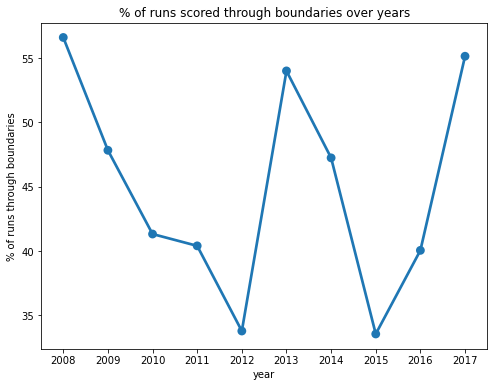

In [46]:
plt.figure(figsize=(8,6))
plt.title('% of runs scored through boundaries over years')
sns.pointplot(df_year.index, df_year['% of runs through boundaries'],ci=None)
plt.show()

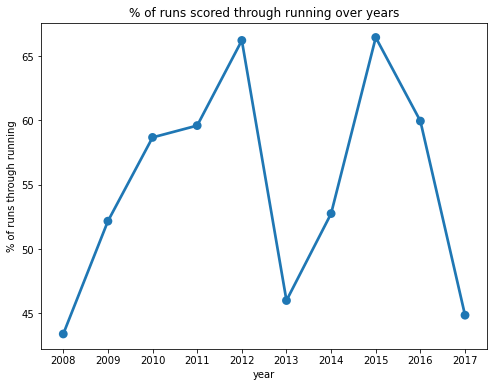

In [47]:
plt.figure(figsize=(8,6))
plt.title('% of runs scored through running over years')
sns.pointplot(df_year.index, df_year['% of runs through running'],ci=None)
plt.show()

In [48]:
df_post_transform = df_year.groupby('post_transform')[['Runs','Runs_in_Boundaries']].sum()
df_post_transform['% of runs through running'] = 100 - round((df_post_transform['Runs_in_Boundaries']/df_post_transform['Runs'])*100 , 
                                                             2)

In [49]:
df_post_transform

,Runs,Runs_in_Boundaries,% of runs through running
post_transform,,,
False,2861,1176,58.90
True,3323,1564,52.93


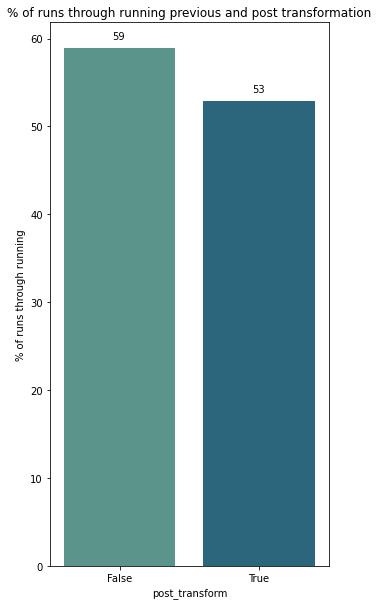

In [50]:
plt.figure(figsize=(5,10))
ax = sns.barplot(y=df_post_transform['% of runs through running'],
                 x= df_post_transform.index,
                 palette='crest');
ax.set(xlabel="post_transform", 
       ylabel = "% of runs through running", 
       title = "% of runs through running previous and post transformation");



for bar in ax.patches:
    ax.annotate(text='{:.0f}'.format(bar.get_height()), xy=(bar.get_x()+0.35, bar.get_height()+1))
    
    

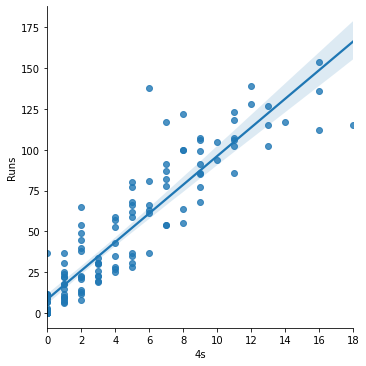

In [51]:
sns.lmplot(x='4s',y='Runs',data=df);

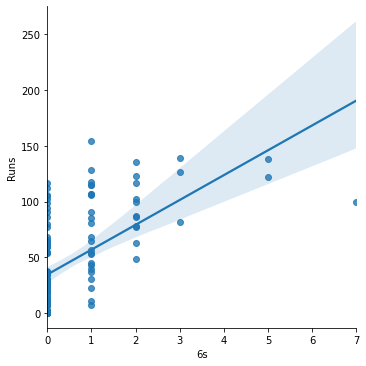

In [52]:
sns.lmplot(x='6s',y='Runs',data=df);